In [1]:
# from google.colab import drive 
# drive.mount('/content/gdrive')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

### Gộp dữ liệu từ 3 trang web lại với nhau

In [16]:
data1= pd.read_csv('./dataset/crawl_DVN.csv', index_col=[0])
data2= pd.read_csv('./dataset/Nam_ChoTot.csv', index_col=[0])
data3= pd.read_csv('./dataset/hiep.csv', index_col=[0])

In [17]:
frames = [data1, data2, data3]
data = pd.concat(frames)
data = data.reset_index()
data = data.drop('index', axis=1)

### Xử lý dữ liệu

In [9]:
dict_ = {'hanh Hóa': 'Thanh Hóa', 'ây Ninh': 'Tây Ninh', 'hái Bình': 'Thái Bình', 'hái Nguyên': 'Thái Nguyên', 'iền Giang': 'Tiền Giang', 'hừa Thiên Huế': 'Thừa Thiên Huế', 'uyên Quang': 'Tuyên Quang', 'rà Vinh':'Trà Vinh'}

In [10]:
for i in range(len(data)):
  x = data.loc[i, 'DiaDiem']
  if x in dict_:
    data.loc[i, 'DiaDiem'] = dict_[x]

### Replace NaN bằng nan

In [ ]:
data = data.fillna('nan')

In [ ]:
data['TinhTrang'].replace('Đã sử dụng', 'Cũ', inplace=True) 

### Giá tiền băng nan: drop

In [ ]:
indexNames = data[ data['GiaTien'] == 'nan' ].index
data.drop(indexNames , inplace=True)

In [ ]:
data['GiaTien'] = data['GiaTien'].astype(int)

### Xe moi SoKmDaDi = 0

In [ ]:
data['TinhTrang'].value_counts()

Cũ     32869
Mới    10188
nan      554
Name: TinhTrang, dtype: int64

#### xe mơi thì SoKmDaDi = nan, vậy thay thế nan bằng 0

In [ ]:
data = data.reset_index()
data = data.drop('index', axis=1)
for i in range(len(data)):
  if data.loc[i, 'TinhTrang'] == 'Mới':
    if data.loc[i, 'SoKmDaDi'] == 'nan':
      data.loc[i, 'SoKmDaDi'] = 0

In [ ]:
indexNames = data[ data['SoKmDaDi'] == 'nan' ].index
data.drop(indexNames , inplace=True)

Dữ liệu crawl đc đẩy lên trong nhiều năm, ví dụ năm 2019 đẩy lên thì nó là xem mới,nhưng bây giờ ở thời điểm hiện tại nó không còn là xem mới nữa. Những trường hợp đó nhóm cũng bỏ luôn

In [ ]:
data = data.reset_index()
data = data.drop('index', axis=1)
for i in range(len(data)):
  if data.loc[i, 'TinhTrang'] == 'Mới':
    if data.loc[i, 'NamSanXuat'] != '2020':
      data = data.drop(i)

### Số chỗ

In [ ]:
data['SoCho'].replace('Khác', 'nan', inplace=True) 

In [ ]:
indexNames = data[ data['SoCho'] == 'nan' ].index
data.drop(indexNames , inplace=True)

In [ ]:
data['SoCho'] = data['SoCho'].astype(int)

### Kieu dáng

In [ ]:
data['KieuDang'].replace('nan', 'Kiểu dáng khác', inplace=True) 

In [ ]:
indexNames = data[ data['SoCho'] == 'Kiểu dáng khác' ].index
data.drop(indexNames , inplace=True)

#### Nhiên liệu nhận giá trị nan thì xóa

In [ ]:
# data[data.NhienLieu != 'Tina']
indexNames = data[ data['NhienLieu'] == 'nan' ].index
data.drop(indexNames , inplace=True)

#### Hop so NaN, drop

In [ ]:
indexNames = data[ data['HopSo'] == 'nan' ].index
data.drop(indexNames , inplace=True)

### XuatXu

In [ ]:
data['XuatXu'].value_counts()

Trong nước    20823
Nhập khẩu     16971
nan            1929
Name: XuatXu, dtype: int64

#### XuatXu nan drop

In [ ]:
indexNames = data[ data['XuatXu'] == 'nan' ].index
data.drop(indexNames , inplace=True)

### DiaDiem

In [ ]:
data['DiaDiem'].value_counts()

Hồ Chí Minh    14165
Hà Nội         10307
Bình Dương      1944
Đồng Nai        1272
Đà Nẵng         1015
               ...  
Điện Biên         13
Hà Giang          12
Bắc Kạn           11
Lai Châu           9
Cao Bằng           8
Name: DiaDiem, Length: 63, dtype: int64

### NamSanXuat

In [ ]:
data['NamSanXuat'].value_counts()

2020              9028
2019              3810
2018              3461
2017              3230
2016              3138
2015              2329
2014              1591
2009              1469
2010              1357
2011              1162
2008              1128
2013               933
2007               867
2012               800
2005               590
2004               511
2003               475
2006               365
2002               274
2001               223
2000               188
1996                87
1995                80
1999                75
1994                71
1997                66
1992                66
1993                56
1998                55
1990                45
trước năm 1980      44
1989                43
1988                43
1987                32
1985                24
1986                23
1991                14
1982                13
1983                13
1981                 9
1984                 6
Name: NamSanXuat, dtype: int64

#### cu qua thi drop

In [ ]:
indexNames = data[ data['NamSanXuat'] == 'trước năm 1980' ].index
data.drop(indexNames , inplace=True)

In [ ]:
data['NamSanXuat'] = data['NamSanXuat'].astype(int)

### TinhTrang

In [ ]:
data['TinhTrang'].value_counts()

Cũ     29259
Mới     8491
Name: TinhTrang, dtype: int64

### DongXe

In [ ]:
x = list(data['DongXe'].value_counts().keys())

In [ ]:
for i in x:
  print(i)

In [ ]:
data['DongXe'].value_counts()

Innova       1887
Morning      1840
Vios         1823
Ranger       1741
Grand i10    1409
             ... 
tra             1
Escort          1
Kalos           1
Ducato          1
Vigor           1
Name: DongXe, Length: 633, dtype: int64

In [ ]:
data = data.reset_index()
data = data.drop('index', axis=1)
for i in range(len(data)):
  data.loc[i, 'DongXe'] = data.loc[i, 'DongXe'].lower()

### Hang

In [ ]:
data['Hang'].value_counts().keys()

Index(['Toyota', 'Hyundai', 'Kia', 'Ford', 'Mazda', 'Mercedes Benz',
       'Mitsubishi', 'Chevrolet', 'Honda', 'Daewoo',
       ...
       'Buick', 'volvo', 'Hummer', 'Lamborghini', 'Maybach', 'GMC', 'dongfeng',
       'Alfa Romeo', 'Ferrari', 'jac'],
      dtype='object', length=101)

In [ ]:
data = data.reset_index()
data = data.drop('index', axis=1)
for i in range(len(data)):
  data.loc[i, 'Hang'] = data.loc[i, 'Hang'].lower()

In [ ]:
indexNames = data[ data['Hang'] == 'hãng khác' ].index
data.drop(indexNames , inplace=True)

### Final

In [ ]:
indexNames = data[ data['SoKmDaDi'] == '70 000 - 74 999' ].index
data.drop(indexNames , inplace=True)

In [ ]:
data['SoKmDaDi'] = data['SoKmDaDi'].astype(int)

In [ ]:
data = data.reset_index()
data = data.drop('index', axis=1)

In [ ]:
data.to_csv('./main_data.csv')

In [ ]:
categorical_features = dict()
for i in data:
    categorical_features[i] = list((set(data[i])))

In [ ]:
import json
with open('./catogorical_features.json', 'w', encoding='utf8') as f:
  json.dump(categorical_features, f, ensure_ascii=False)

### Visualize của từng trường



In [ ]:
import matplotlib.pyplot as plt
def visualize(df,x,y):
  newdf = df[[x,y]]
  newdf = newdf.groupby(x)[y].mean().reset_index(name=y)
  newdf = newdf.sort_values(by=y, ascending=False)
  data = {}
  rows = newdf.shape[0]
  for i in range(rows):
    a = newdf.iloc[i]
    xaxis = a[0]
    yaxis = a[1]
    data[xaxis] = yaxis;
  names = list(data.keys())
  values = list(data.values())

  fig, axs = plt.subplots(1,tight_layout=True, figsize=(20, 10))
  axs.bar(names, values)
  axs.tick_params(axis='x', rotation=70)

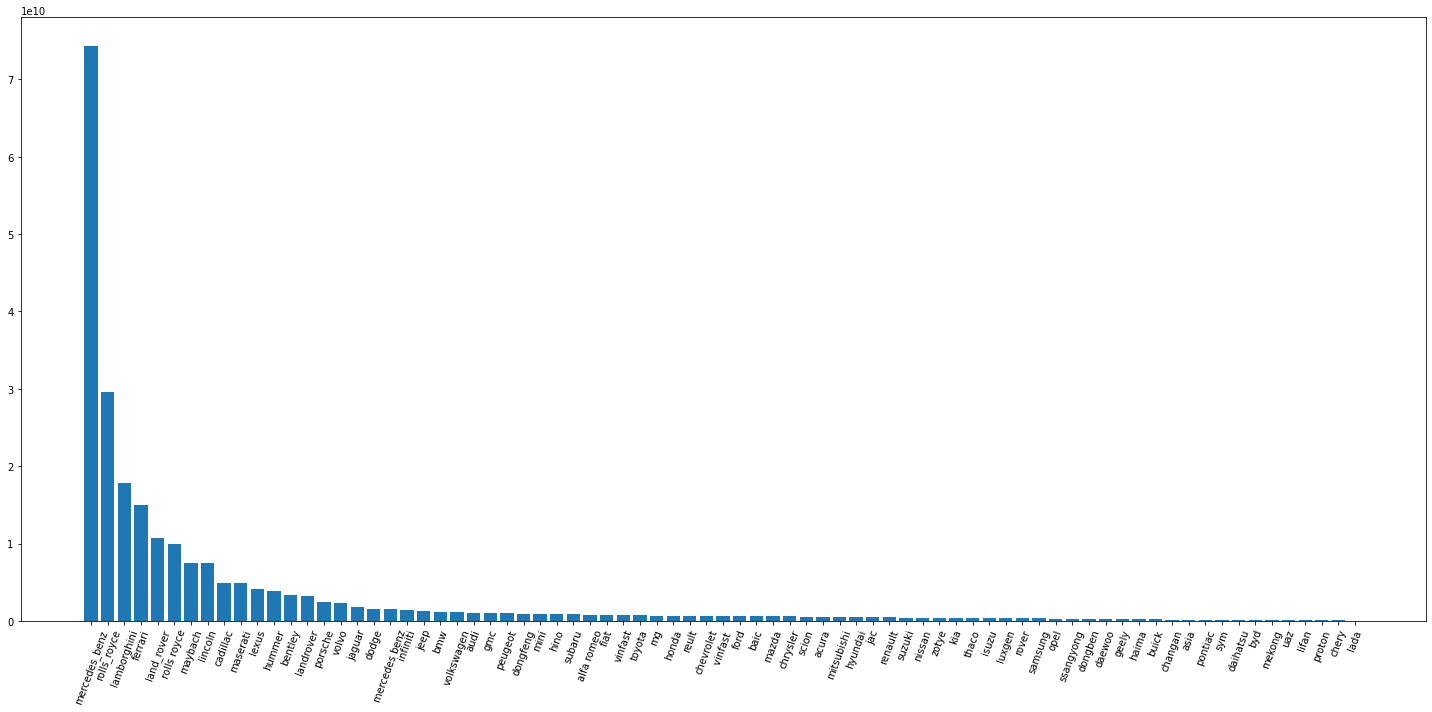

In [ ]:
visualize(data,'Hang','GiaTien')

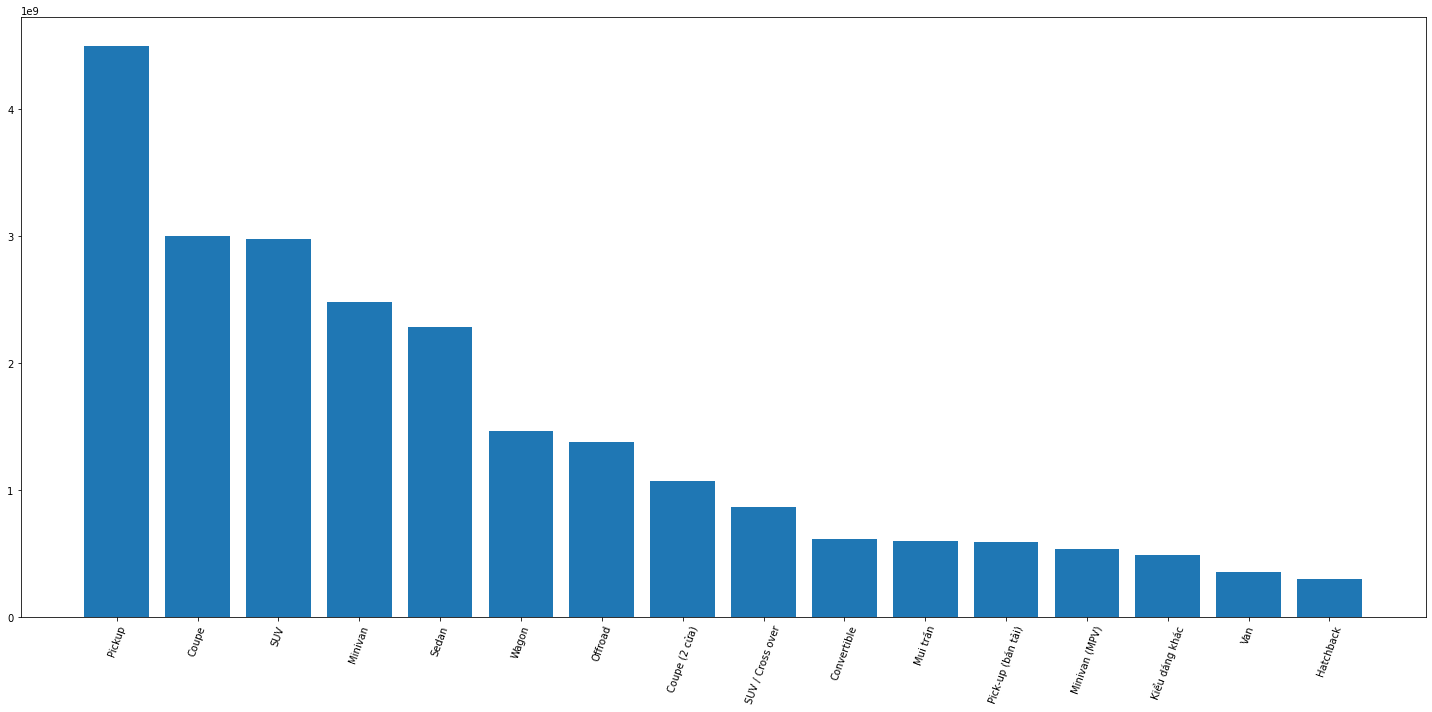

In [ ]:
visualize(data,'KieuDang','GiaTien')

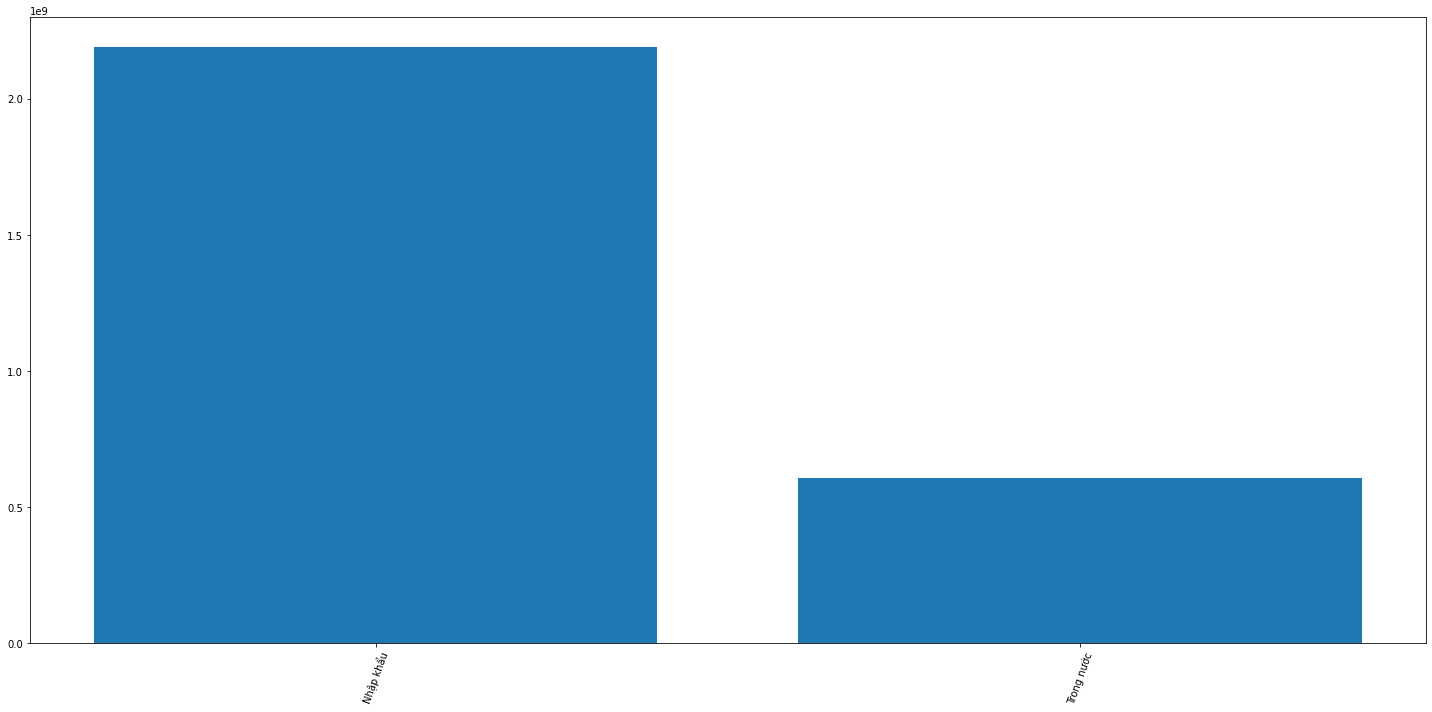

In [ ]:
visualize(data,'XuatXu','GiaTien')

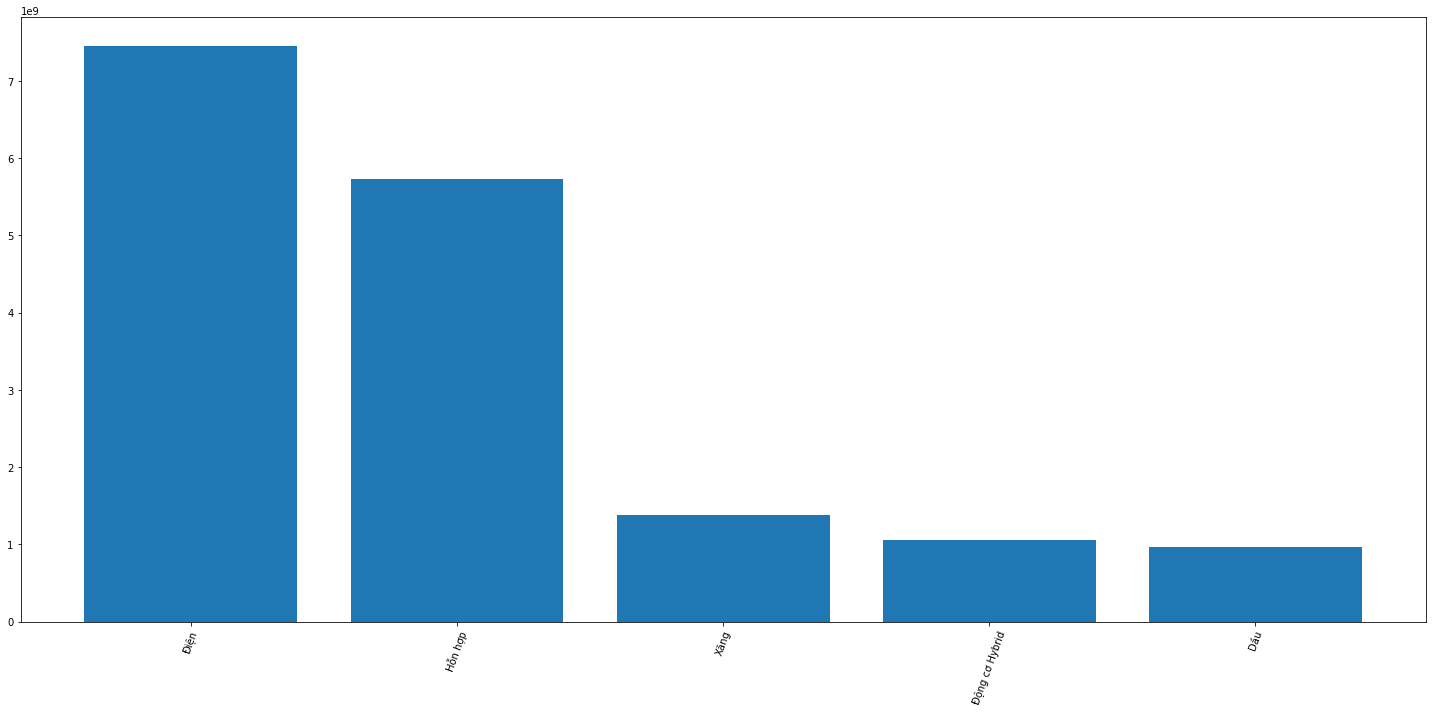

In [ ]:
visualize(data,'NhienLieu','GiaTien')

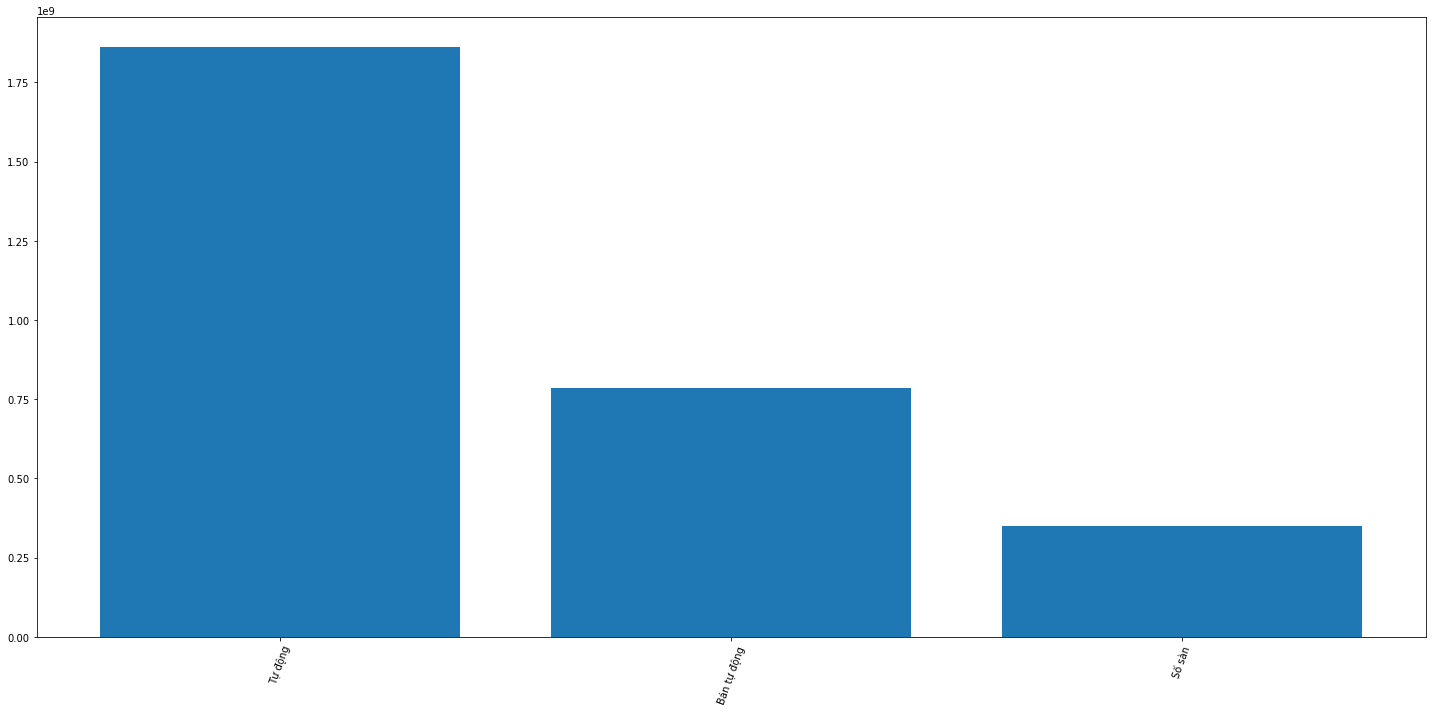

In [ ]:
visualize(data,'HopSo','GiaTien')

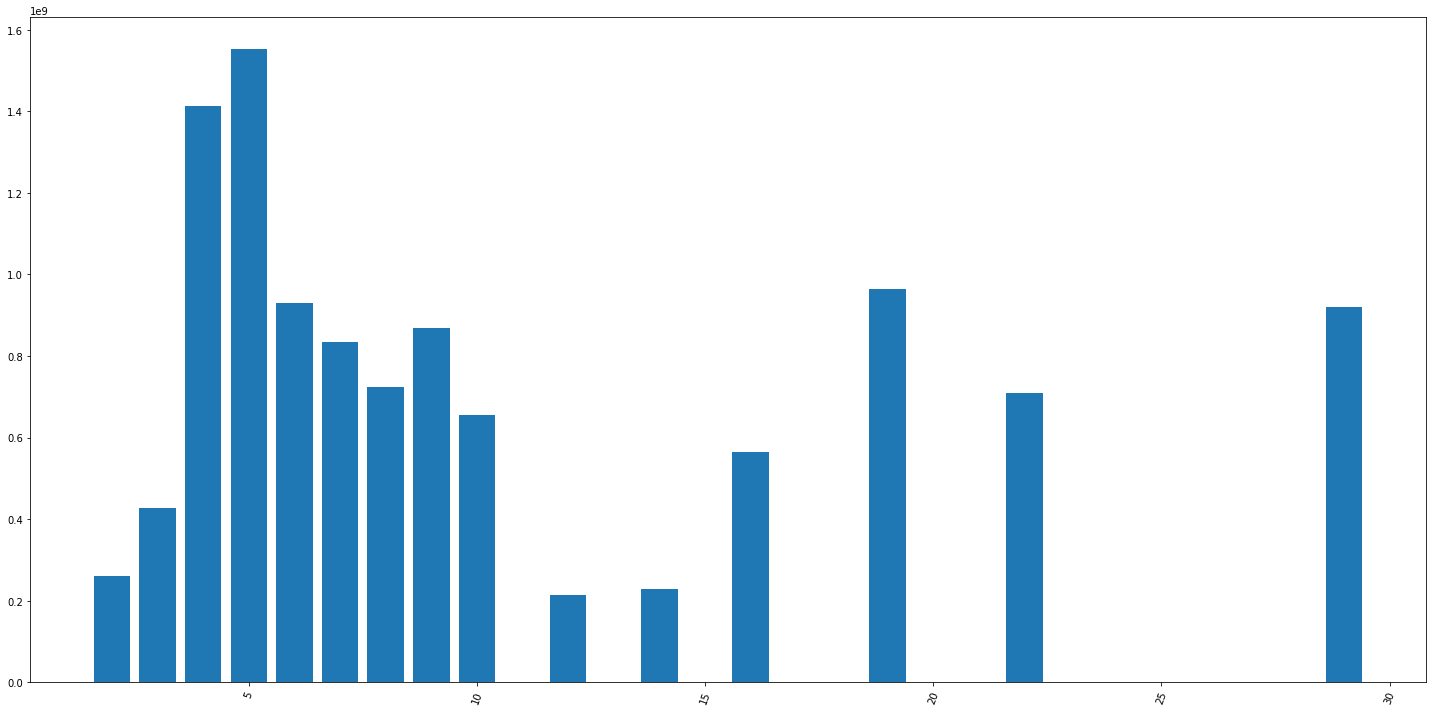

In [ ]:
visualize(data,'SoCho','GiaTien')

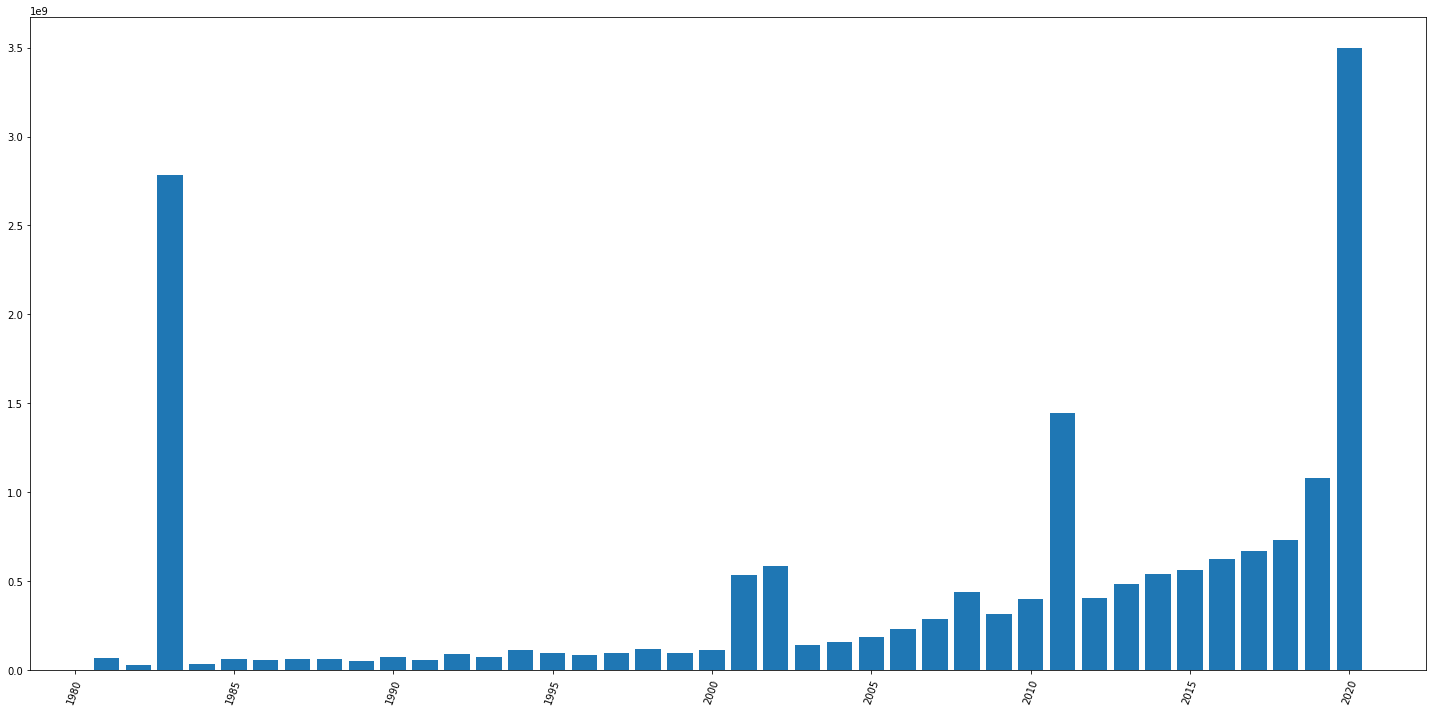

In [ ]:
visualize(data,'NamSanXuat','GiaTien')

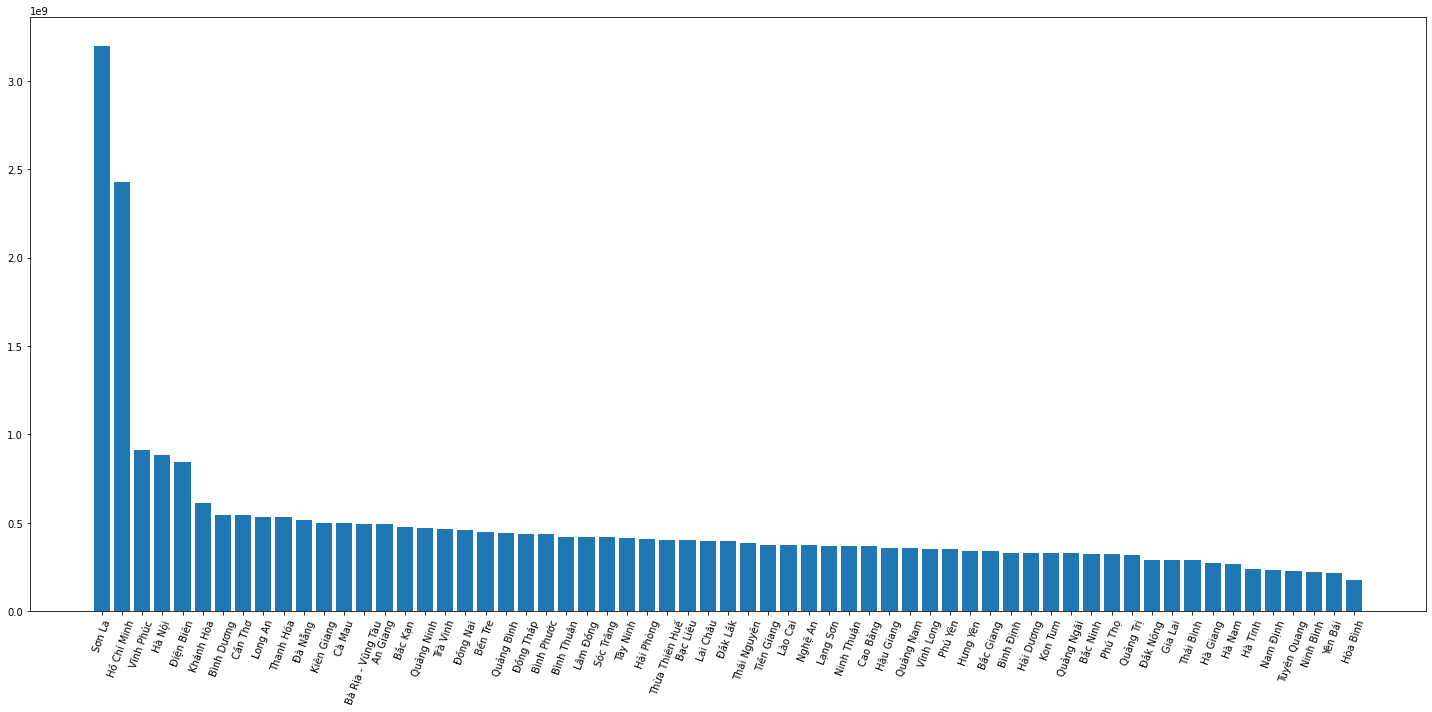

In [ ]:
visualize(data,'DiaDiem','GiaTien')

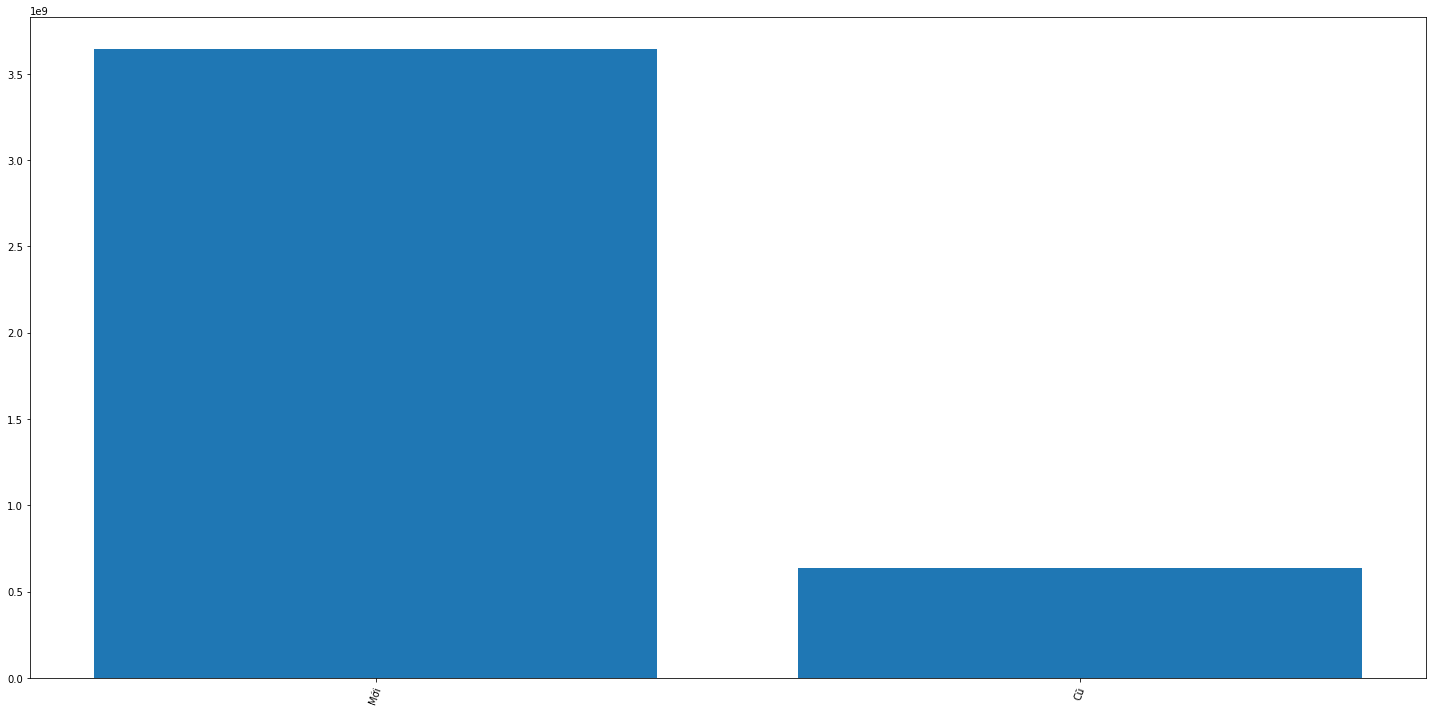

In [ ]:
visualize(data,'TinhTrang','GiaTien')

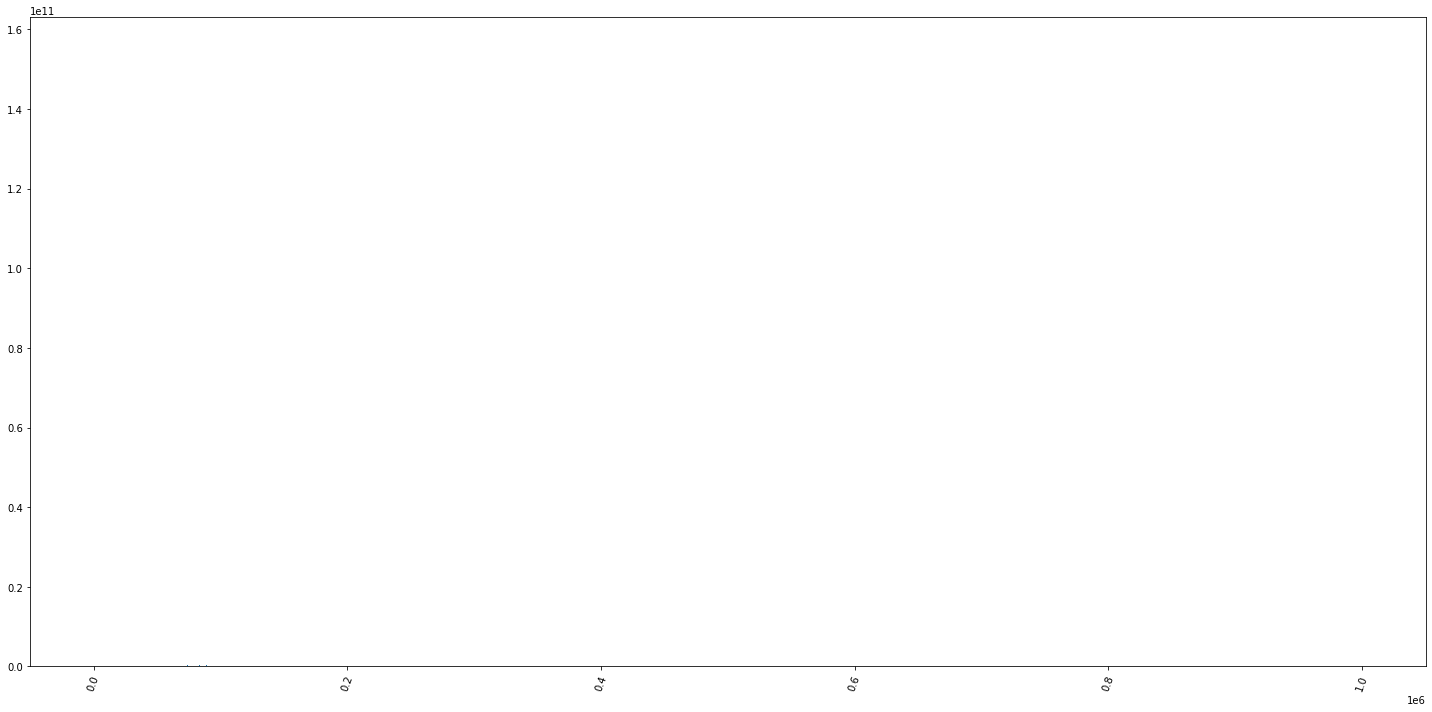

In [ ]:
visualize(data,'SoKmDaDi','GiaTien')